In [1]:
import freud
import gsd.fl
import gsd.hoomd
import numpy as np
#import msd_plot as msd
import matplotlib.pyplot as plt
import signac
print(gsd.__version__)
print(freud.__version__)

1.10.0
1.2.2


In [2]:
def find_starting_frame(trajectory):
    '''
    Checks to see where shrinking stops
    If the sim doesnt involve shrinking, then starting frame should be 0
    '''
    box_dims = trajectory[-1].configuration.box[:3]
    for i in range(0, len(trajectory)):
        if np.array_equal(trajectory[i].configuration.box[:3], box_dims):
            starting_index = i
            break
    return(starting_index)

def plot_rdf(files, labels, types, title, num_frames=1, r_max=8, dr=0.25):
    '''
    This is the primary funciton you will interface with.
    files, labels, and types need to be passed into the funcion as lists.
    Even if you are only plotting one file, pass in a list of length 1 [file]
    
    files: Path to the .gsd file you want to plot
    types: The actual atom-types used/created in hoomd.
    lables: Your own labels, used to create the plot legend
            what is different between the files you're plotting? temperature for example
            [2.0, 1.8, 1.6]
    title: Plot title
    num_frames: How many frames do you want to average over? This starts at the last frame   
    '''
    
    fig = plt.figure()
    for i, f in enumerate(files):
        rdf, x, y = average_rdf(f, types, num_frames, r_max, dr)
        plt.plot(x, y, label = labels[i])
        rdf.reset()
    plt.legend()
    plt.title(title)
    plt.show()
    rdf.reset()

def average_rdf(file, types, num_frames=1, r_max=8, dr=0.25):
    #print('FILE = {}'.format(file))
    gsd_file = gsd.fl.GSDFile(file, "rb")
    trajectory = gsd.hoomd.HOOMDTrajectory(gsd_file)
    #starting_frame = find_starting_frame(trajectory) # First frame at final box dims
    #print("STARTING FRAME = {}".format(starting_frame))
    #if num_frames > len(trajectory) - starting_frame:
    #    print('Using this many frames will result in multiple box sizes being used')
    #    return
    x, y, z = trajectory[-1].configuration.box[:3]
    if r_max == None:
        if x == y and x == z:
            r_max = x // 2
        else:
            r_max = 8
    system_box = freud.box.Box(x, y, z)
    rdf = freud.density.RDF(r_max, dr)
    for i in range(1, num_frames + 1):
        frame = trajectory[-i]
        rdf = single_frame_rdf(frame=frame, types=types, rdf=rdf, box=system_box)
    x_data = rdf.R
    y_data = rdf.RDF
    return rdf, x_data, y_data
    
def single_frame_rdf(frame, types, rdf, box):
    
    if types[0] == 'all':
        positions = frame.particles.position
    else:
        positions = []
        #for atom_type in types:
        for idx, type_id in enumerate(frame.particles.typeid):
            if frame.particles.types[type_id] in types:
                positions.append(frame.particles.position[idx])
    print('# OF PARTICLES = {}'.format(len(positions)))
    rdf.accumulate(box=box, ref_points = positions)
    return rdf

In [3]:
temps = ['1','10', '30', '50']
bond_weights = ['1','2','4']
def get_files(T=None, bw=None):
    file_paths=[]
    if T: 
        for i in bond_weights:
            file_paths.append("bondweight{}_T{}/data.gsd".format(i,T))
    if bw:
        for i in temps:
            file_paths.append("bondweight{}_T{}/data.gsd".format(bw,i))
    return file_paths

# OF PARTICLES = 50000
# OF PARTICLES = 50000
# OF PARTICLES = 50000


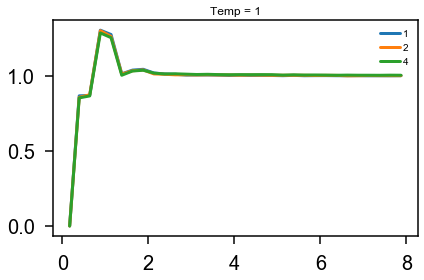

In [4]:
#The gsd files for a bondweight of 10 and 30 are bad. Likely becuase a bondweight that high at a temperature this
# low didn't work. With the bondweights of 1, 2, and 4, the rdfs are the same. This can also be seen in the vmd images.
# 
plot_rdf(get_files(T='1'), labels=bond_weights, types=['all'], title='Temp = 1')

# OF PARTICLES = 20000
# OF PARTICLES = 20000
# OF PARTICLES = 20000
# OF PARTICLES = 20000


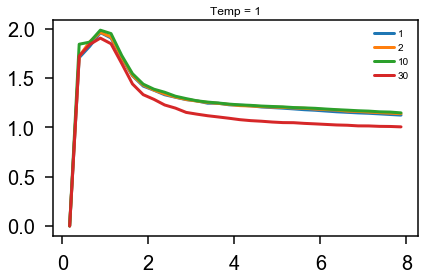

In [36]:
plot_rdf(get_files(T='10'), labels=bond_weights, types=['C'], title='Temp = 1')

In [27]:
temps = ['1','10', '30', '50']
bond_weights = ['1','2','10','30']
def get_files(T=None, bw=None):
    file_paths=[]
    if T: 
        for i in bond_weights:
            file_paths.append("bondweight{}_T{}/data.gsd".format(i,T))
    if bw:
        for i in temps:
            file_paths.append("bondweight{}_T{}/data.gsd".format(bw,i))
    return file_paths

# OF PARTICLES = 30000
# OF PARTICLES = 30000
# OF PARTICLES = 30000
# OF PARTICLES = 30000


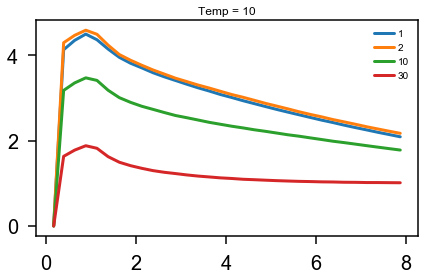

In [37]:
#T10 and bond weight of 4 is a bad gsd file
plot_rdf(get_files(T='10'), labels=bond_weights, types=['A','B'], title='Temp = 10')

In [23]:
temps = ['1','10', '30', '50']
bond_weights = ['4','10','30']
def get_files(T=None, bw=None):
    file_paths=[]
    if T: 
        for i in bond_weights:
            file_paths.append("bondweight{}_T{}/data.gsd".format(i,T))
    if bw:
        for i in temps:
            file_paths.append("bondweight{}_T{}/data.gsd".format(bw,i))
    return file_paths

# OF PARTICLES = 50000
# OF PARTICLES = 50000
# OF PARTICLES = 50000


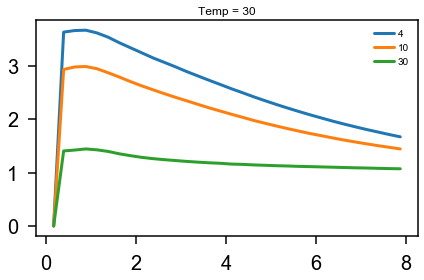

In [24]:
#T30 and Bondweights 1 and 2 are bad GSD files
plot_rdf(get_files(T='30'), labels=bond_weights, types=['all'], title='Temp = 30')

# OF PARTICLES = 50000
# OF PARTICLES = 50000
# OF PARTICLES = 50000
# OF PARTICLES = 50000
# OF PARTICLES = 50000


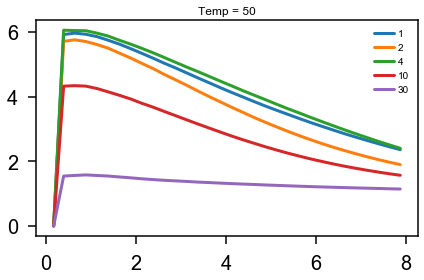

In [30]:
plot_rdf(get_files(T='50'), labels=bond_weights, types=['all'], title='Temp = 50')